# ML with Least Square GD

In this notebook, we will use the functions in the file least_squares_GD.py. 

In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from IPython import display
# Import everything in the functions folder
from functions.costs import *
from functions.proj1_helpers import *
from functions.split import *
from functions.least_squares_GD import *
from functions.helpers import *

First, we load the data

In [2]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

We split the data, just to see if we can predict something

In [3]:
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(tX, y, ratio)
nbr_param = len(x_train[0])

We plot the graph Loss vs Epochs while doing the Gradient Descent

KeyboardInterrupt: 

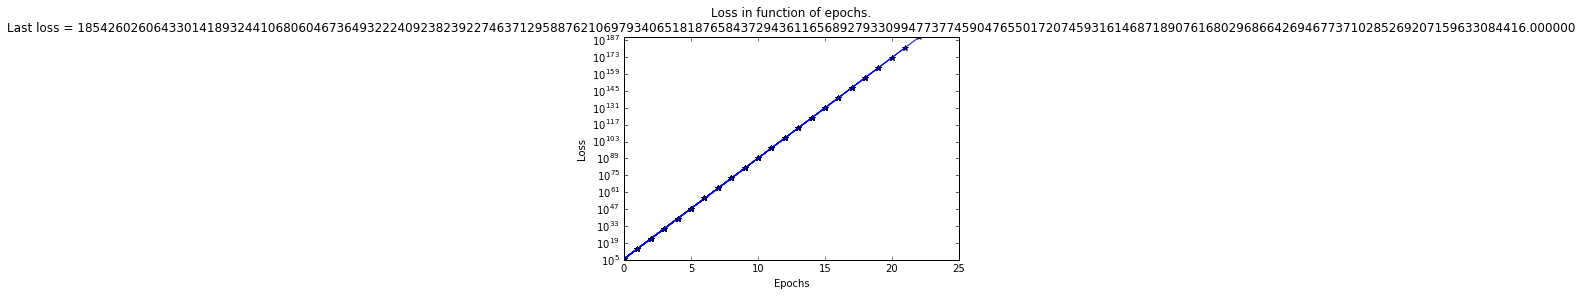

In [6]:
# Define the parameters of the algorithm.
max_iters = 300
gamma = 0.1

# Initialization
gradient_losses, gradient_ws = least_squares_GD(y_train, x_train, 
                                                max_iters, gamma)

We just take w_star as the last w

In [8]:
w_star, min_loss = get_best_model(gradient_losses, gradient_ws)
print("Min loss = %f"%(min_loss))

Min loss = 0.758990


Compute the prediction

In [9]:
pred = np.dot(x_train, w_star)

pred_bin = []

for i in pred:
    if i > 0:
        pred_bin.append(1)
    else:
        pred_bin.append(-1)
        
wrong = 0
right = 0
for i in range(len(y_train)):
    if y_train[i] == pred_bin[i]:
        right = right + 1
    else:
        wrong = wrong + 1
        
print("Wrong prediction: %i (%f%%)\nGood prediction: %i (%f%%)"%
      (wrong, 100*wrong/len(y_train), right, 100*right/len(y_train)))    

Wrong prediction: 74468 (37.234000%)
Good prediction: 125532 (62.766000%)


## Generate predictions and save ouput in csv format for submission:


We retrain on all the data.

Min loss = 0.758149


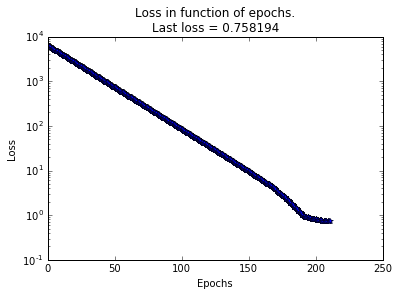

In [16]:
# Define the parameters of the algorithm.
max_iters = 300
gamma = 0.1

# Initialization
gradient_losses, gradient_ws = least_squares_GD(y, tX, 
                                                max_iters, gamma)
w_star, min_loss = get_best_model(gradient_losses, gradient_ws)
print("Min loss = %f"%(min_loss))

In [17]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [18]:
OUTPUT_PATH = 'output/LS_GD.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w_star, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)